In [18]:
import numpy as np;
import matplotlib.pyplot as plt;
import sklearn as skl;
from sklearn.linear_model import LinearRegression;

In [19]:
import csv
import datetime
import dateutil.parser as parser;

date = []
temp = []

with open('../../data/data.csv') as data_file:
    csv_reader = csv.reader(data_file, delimiter=',')
    for row in csv_reader:
        date.append(row[0])
        temp.append(float(row[1]))

data_points_count = 12 * 100;
x = np.array(list(range(0, data_points_count))).reshape((-1, 1));
y = np.array(temp[-1 * data_points_count:]);
print(y)

[-0.18 -0.23 -0.23 ...  0.92  0.91  0.94]


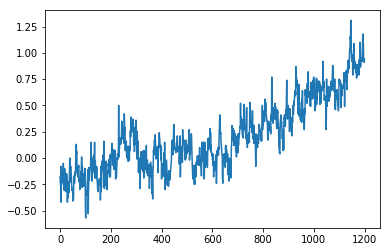

In [20]:
plt.plot(x,y)
plt.show();

In [21]:
model = LinearRegression();
model.fit(x, y)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

print(x)
print(y)
r_sq = model.score(x, y);
print(r_sq)

intercept: -0.30014865389952805
slope: [0.00084085]
predicted response:
[-0.30014865 -0.2993078  -0.29846695 ...  0.70635028  0.70719114
  0.70803199]
[[   0]
 [   1]
 [   2]
 ...
 [1197]
 [1198]
 [1199]]
[-0.18 -0.23 -0.23 ...  0.92  0.91  0.94]
0.7396001786202846


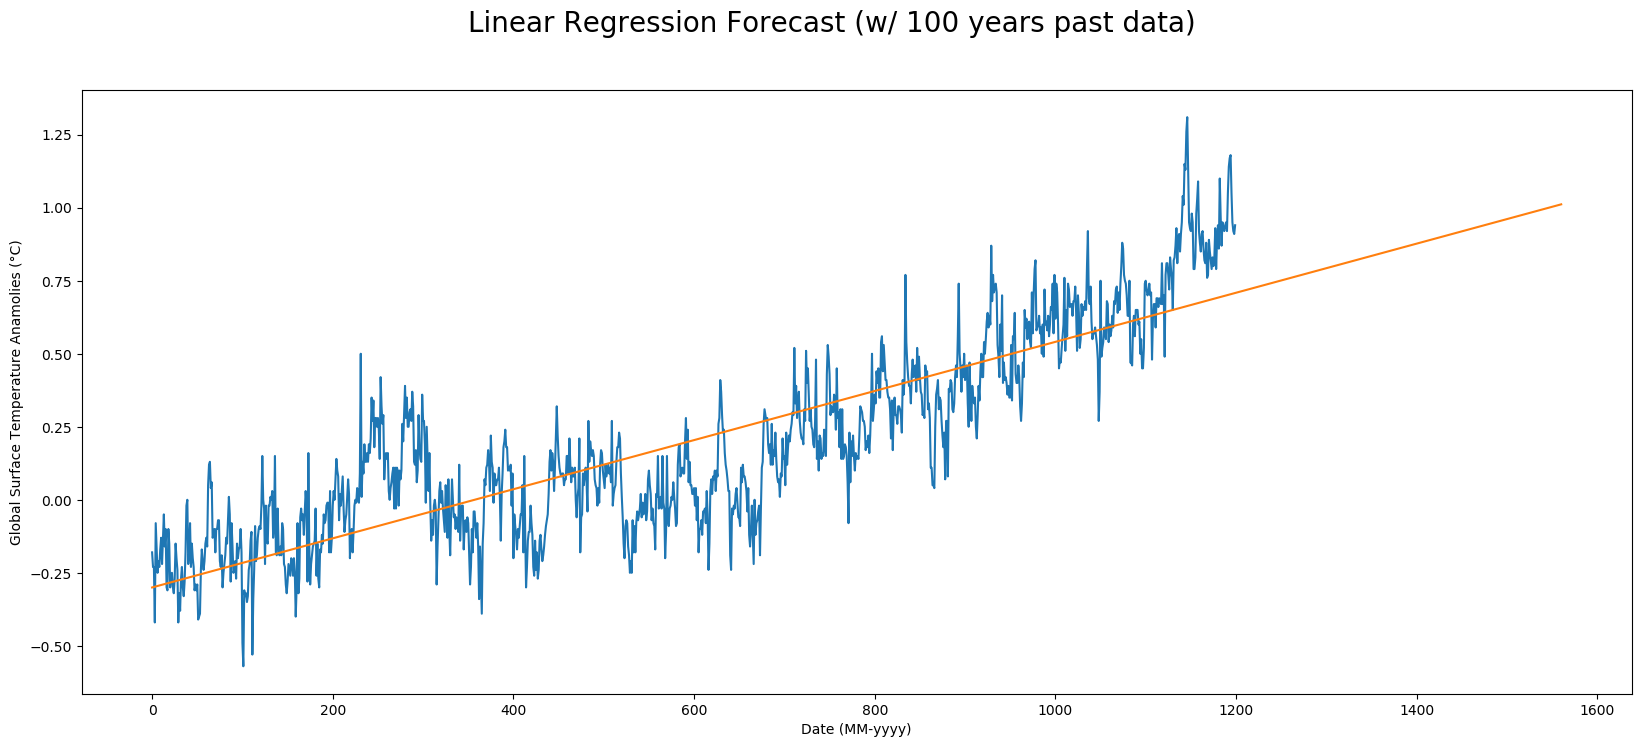

In [22]:
fig = plt.figure(figsize=(20, 8), dpi=100, facecolor='w', edgecolor='k')
fig.suptitle(f'Linear Regression Forecast (w/ {int(data_points_count/12)} years past data)', fontsize=20)
plt.plot(x,y)
plt.xlabel('Date (MM-yyyy)')
plt.ylabel('Global Surface Temperature Anamolies (°C)')
plt.plot([0, data_points_count + 30 * 12], [model.intercept_, model.coef_ * (data_points_count + 30 * 12) + model.intercept_])
plt.show()